## VIsualization Project (R - ggplot, dplyr)

Which area in New York is the best choice for travelers. We will analyze the customer feedback and suggest the area for travelers by the various types of visualiztaion.  
- Data1: New York hotel dataset in Kaggle
- Data2: Airbnb customer feedback in Airbnb site
- Data3: New York top 23 attraction place

In [1]:
library(ggplot2)
library(dplyr)
library(broom)

df_attr <- read.csv("ny_attr_coord.csv")  # New York top 23 visited attractions lists
df_ny <- read.csv("listings.csv")  # New York City Airbnb data
df_jc <- read.csv("listings_ab_Jersey_city.csv")  # Jersey City Airbnb data
df_hotel <- read.csv("new_york_hotels2.csv")   # New York Hotel data
#df_ab <- read.csv("AB_US_2020.csv") # Kaggle Airbnb data - to be obslate






Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# Combine data with New York City and Jersey City.
df_jc_s <- df_jc %>% select(id, host_id, host_name, host_is_superhost, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, bathrooms, bedrooms, beds, price, review_scores_rating, review_scores_location, review_scores_cleanliness, number_of_reviews, reviews_per_month)
df_ny_s <- df_ny %>% select(id, host_id, host_name, host_is_superhost, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, bathrooms, bedrooms, beds, price, review_scores_rating, review_scores_location, review_scores_cleanliness, number_of_reviews, reviews_per_month)
# more columns: df_reviews <- df_review %>% select(id, host_id, host_name, host_location, host_is_superhost, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, review_scores_rating, review_scores_accuracy, number_of_reviews, reviews_per_month)
# dim(df_reviews)
# dim(df_jc)

df_reviews <- rbind(df_ny_s, df_jc_s)


Warning message in `[<-.factor`(`*tmp*`, ri, value = c(10L, 0L, 0L, 125L, 353L, :
“invalid factor level, NA generated”

In [3]:
# Airbnb data cleaning
df_reviews <- df_reviews %>% select(id, host_id, host_name, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type,bedrooms, beds, price, review_scores_rating, review_scores_location, review_scores_cleanliness, number_of_reviews, reviews_per_month)
# plus amenity: df_reviews <- df_review %>% select(id, host_id, host_name, host_location, host_is_superhost, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, review_scores_rating, review_scores_accuracy, number_of_reviews, reviews_per_month)
df_reviews <- df_reviews %>% dplyr::rename(neighborhood = neighbourhood_cleansed, neighborhood_group = neighbourhood_group_cleansed, rating = review_scores_rating, cleanliness = review_scores_cleanliness)
head(df_reviews)



id   host_id host_name   neighborhood       neighborhood_group latitude
1 2595 2845    Jennifer    Midtown            Manhattan          40.75362
2 3831 4869    LisaRoxanne Clinton Hill       Brooklyn           40.68514
3 5121 7356    Garon       Bedford-Stuyvesant Brooklyn           40.68688
4 5136 7378    Rebecca     Sunset Park        Brooklyn           40.6612 
5 5178 8967    Shunichi    Hell's Kitchen     Manhattan          40.76489
6 5203 7490    MaryEllen   Upper West Side    Manhattan          40.80178
  longitude property_type             room_type       bedrooms beds price   
1 -73.98377 Entire apartment          Entire home/apt          1    $175.00 
2 -73.95976 Entire guest suite        Entire home/apt 1        3    $76.00  
3 -73.95596 Private room in apartment Private room    1        1    $60.00  
4 -73.99423 Entire apartment          Entire home/apt 2        2    $175.00 
5 -73.98493 Private room in apartment Private room    1        1    $73.00  
6 -73.96723 Private room in apartment Private room    1        1    $75.00  
  rating review_scores_location cleanliness number_of_reviews reviews_per_month
1 94     10                     9           48                0.36             
2 89     9                      9           354               4.82             
3 90     9                      8           50                0.36             
4 97     8                      10          1                 0.01             
5 84     10                     7           473               3.4              
6 98     10                     10          118               0.87

In [4]:
str(df_reviews)

'data.frame':	45679 obs. of  17 variables:
 $ id                    : int  2595 3831 5121 5136 5178 5203 5552 5803 6021 6848 ...
 $ host_id               : Factor w/ 34252 levels ""," 'offline_government_id'",..: 16588 24913 30010 30055 32351 30237 31624 33374 1955 6633 ...
 $ host_name             : Factor w/ 10825 levels ""," 'identity_manual']\"",..: 4505 5773 3353 8053 9008 6413 6230 5557 1943 431 ...
 $ neighborhood          : Factor w/ 281 levels ""," \"\"Hair dryer\"\"",..: 169 77 47 238 136 250 257 230 250 262 ...
 $ neighborhood_group    : Factor w/ 60 levels ""," \"\"Dishes and silverware\"\"",..: 52 50 50 50 52 52 52 50 52 50 ...
 $ latitude              : Factor w/ 18589 levels ""," \"\"Essentials\"\"",..: 11246 4817 4988 2772 12306 15016 9594 3287 14717 6992 ...
 $ longitude             : Factor w/ 15451 levels ""," \"\"Heating\"\"]\"",..: 11063 8768 8390 12105 11179 9496 13545 11463 8904 8146 ...
 $ property_type         : Factor w/ 159 levels "","-73.82163",..: 77 82 96 

In [5]:
df_reviews$price = as.numeric(gsub("\\$", "", df_reviews$price))
df_reviews <- df_reviews[!grepl("\\d", df_reviews$neighborhood),]  # remove number value
df_reviews <- df_reviews[!grepl("Hair dryer", df_reviews$neighborhood),]
df_reviews <- df_reviews[!grepl("\\d", df_reviews$neighborhood_group),]
df_reviews <- df_reviews[!grepl("Priva", df_reviews$neighborhood_group),]
df_reviews <- df_reviews[!grepl("Entire", df_reviews$neighborhood_group),]
df_reviews <- df_reviews[!(is.na(df_reviews$neighborhood_group)),]
df_reviews$neighborhood_group <- as.character(df_reviews$neighborhood_group)
df_reviews$neighborhood <- as.character(df_reviews$neighborhood)
df_reviews <- df_reviews[!(is.na(df_reviews$latitude)),]
df_reviews <- df_reviews[!(is.na(df_reviews$longitude)),]

df_reviews$latitude <- as.numeric(as.character(df_reviews$latitude))
df_reviews$longitude <- as.numeric(as.character(df_reviews$longitude))
df_reviews$review_scores_location <- as.numeric(df_reviews$review_scores_location)
df_reviews$rating <- as.numeric(as.character(df_reviews$rating))
df_reviews$cleanliness <- as.numeric(as.character(df_reviews$cleanliness))

head(df_reviews)

# df_reviews %>% group_by(neighborhood) %>% summarize(count = n()) %>% filter(count == 3)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

id   host_id host_name   neighborhood       neighborhood_group latitude
1 2595 2845    Jennifer    Midtown            Manhattan          40.75362
2 3831 4869    LisaRoxanne Clinton Hill       Brooklyn           40.68514
3 5121 7356    Garon       Bedford-Stuyvesant Brooklyn           40.68688
4 5136 7378    Rebecca     Sunset Park        Brooklyn           40.66120
5 5178 8967    Shunichi    Hell's Kitchen     Manhattan          40.76489
6 5203 7490    MaryEllen   Upper West Side    Manhattan          40.80178
  longitude property_type             room_type       bedrooms beds price
1 -73.98377 Entire apartment          Entire home/apt          1    175  
2 -73.95976 Entire guest suite        Entire home/apt 1        3     76  
3 -73.95596 Private room in apartment Private room    1        1     60  
4 -73.99423 Entire apartment          Entire home/apt 2        2    175  
5 -73.98493 Private room in apartment Private room    1        1     73  
6 -73.96723 Private room in apartment Private room    1        1     75  
  rating review_scores_location cleanliness number_of_reviews reviews_per_month
1 94     10                      9          48                0.36             
2 89      9                      9          354               4.82             
3 90      9                      8          50                0.36             
4 97      8                     10          1                 0.01             
5 84     10                      7          473               3.4              
6 98     10                     10          118               0.87

In [6]:
# Cleaning neighborhood_group data (1Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx' '' 't' 'Jersey City, New Jersey, United States'
df_reviews <- df_reviews[!(df_reviews$room_type == ""),]
df_reviews <- df_reviews[!grepl("\\d", df_reviews$room_type),]
df_reviews %>% group_by(room_type) %>% tally()


room_type       n    
1 Entire home/apt 23630
2 Hotel room        374
3 Private room    20643
4 Shared room       905

In [7]:
# Cleaning room type data
df_reviews <- df_reviews[!grepl("\\d", df_reviews$neighborhood_group),]
df_reviews$neighborhood_group[df_reviews$neighborhood_group == ""] = "Jersey City"
df_reviews$neighborhood_group[grepl("United", df_reviews$neighborhood_group)] = "Jersey City"

## Exploring Data

In [8]:
unique(df_reviews$neighborhood_group)

[1] "Manhattan"     "Brooklyn"      "Queens"        "Staten Island"
[5] "Bronx"         "Jersey City"

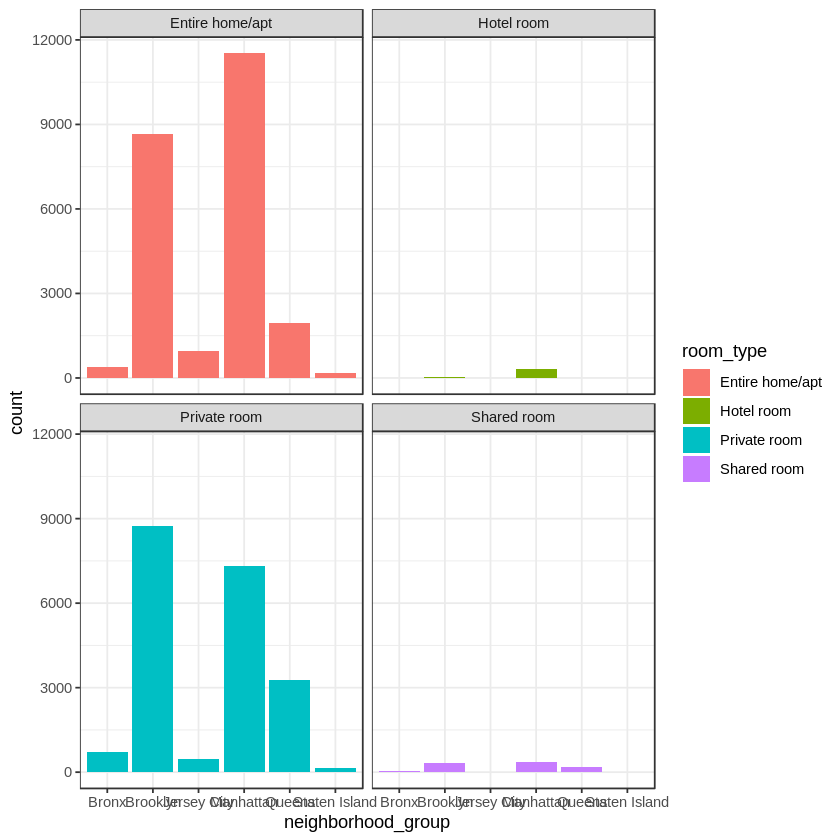

In [9]:
ggplot(df_reviews, aes(neighborhood_group, fill = room_type)) + 
geom_bar(position = "dodge")+ facet_wrap(~room_type)+
theme_bw() 

Warning message:
“Removed 305 rows containing missing values (geom_point).”

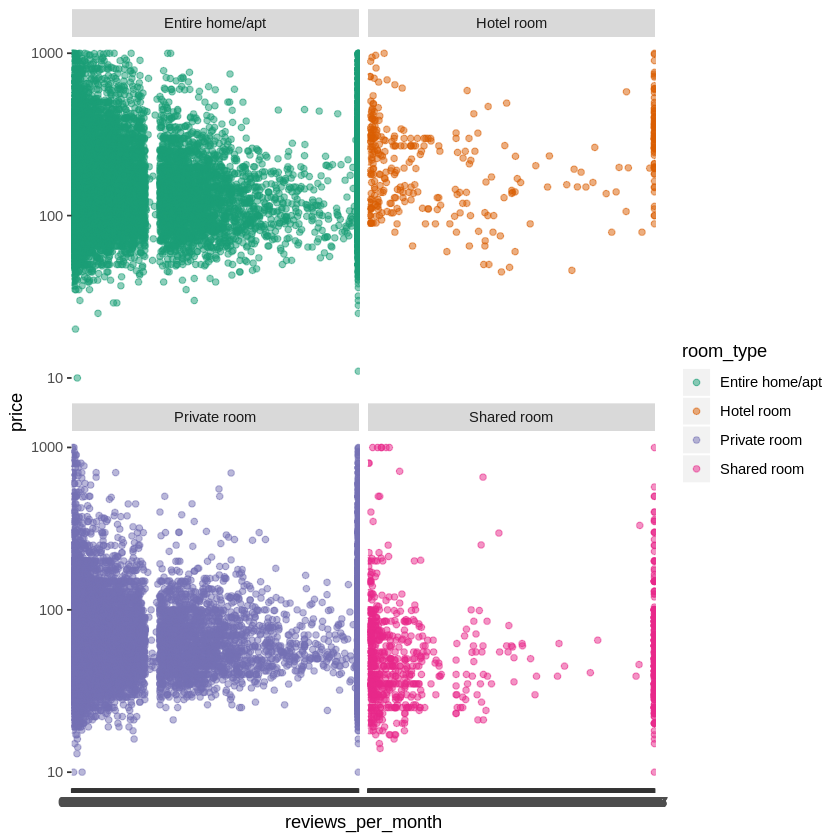

In [10]:
ggplot(df_reviews, aes(reviews_per_month, price, color = room_type)) + geom_point(alpha = 0.5) +
scale_y_log10() + facet_wrap(~room_type) + scale_color_brewer(palette = "Dark2")

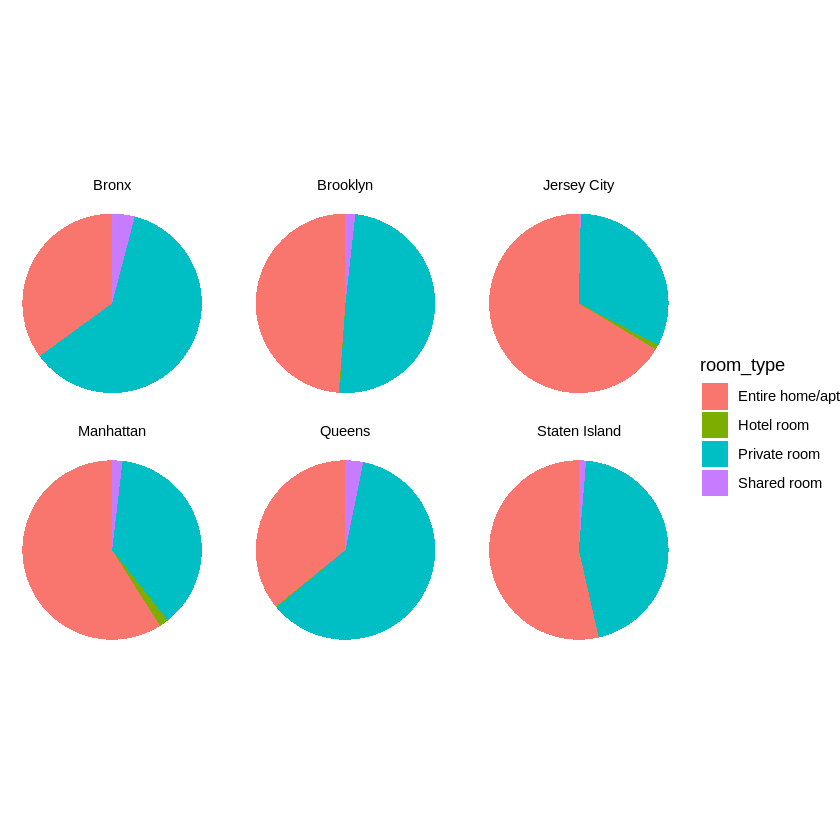

In [11]:
ggplot(df_reviews) + 
geom_bar(mapping = aes(x=factor(1), fill = room_type), width=1, position = position_fill()) + 
coord_polar(theta="y") + theme_void() + facet_wrap(~neighborhood_group) 

# ggplot(data = donds) + geom_bar(mapping = aes(x = factor(1), fill = cut), width=1) + coord_polar(theta="y") + theme_void() 


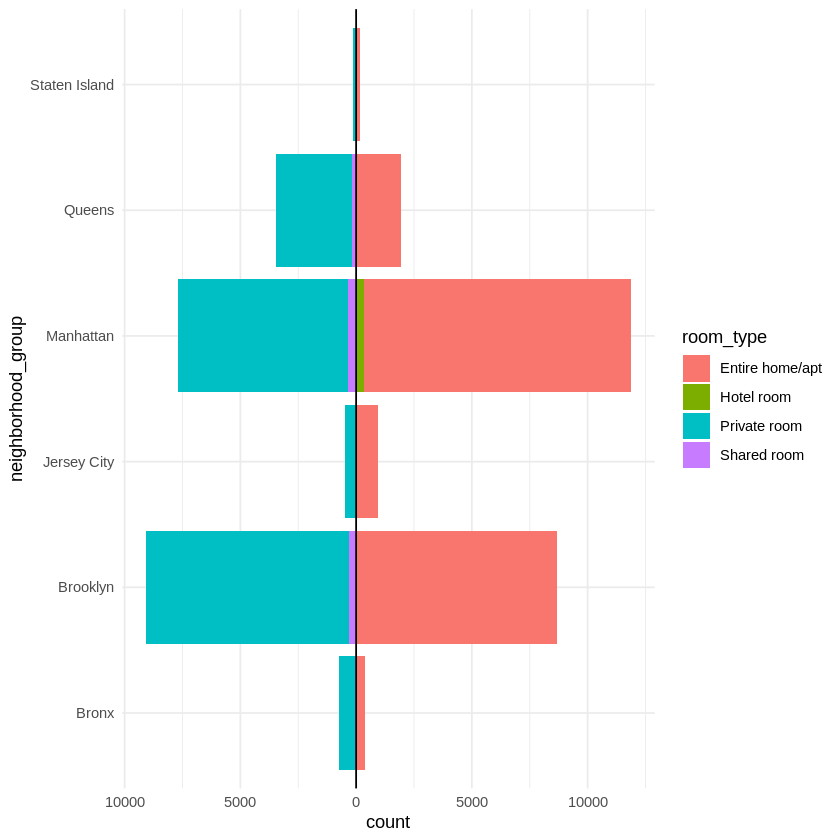

In [12]:
ggplot(df_reviews, aes(neighborhood_group, fill = room_type)) + 
geom_bar(data = subset(df_reviews, room_type == "Entire home/apt" | room_type == "Hotel room")) +
geom_bar(data = subset(df_reviews, room_type == "Private room" | room_type == "Shared room"), aes(y=..count..*(-1))) +
coord_flip() + theme_minimal() +
scale_y_continuous(labels = abs) +
geom_abline(slope =0)

In [13]:
library(RColorBrewer)
my_theme <- function() {
# Generate the colors for the chart procedurally with RColorBrewer
palette <- brewer.pal("Greys", n=9) # create a palette of shades of grey. 9가 가장 진한 회색이라 정함. 
color.background = palette[1] # background plot color. 이경우 1이 하얀색이 된다.
color.grid.major = palette[3] 
color.grid.minor = palette[2]
color.axis.text = palette[6] # text color 
color.axis.title = palette[7]
color.title = palette[9]
# Begin construction of chart
theme_bw(base_size=9) +
# Set the entire chart region to a white color
theme(panel.background=element_rect(fill=color.background, color=color.background)) +  # 위에서 정한대로 color.background 는 palette[1] 이므로 하얀색이 된다. Panel은 그래프만 있는 부분, x y 레이블 빠짐. fill 로 바탕을 채우고 color 로 테두리선.
theme(plot.background=element_rect(fill=color.background, color=color.background)) +  # 전체 백그라운드
theme(panel.border=element_rect(color=color.background)) +  # 그래프영역 테두리 색깔
# Format the grid
theme(panel.grid.major=element_line(color=color.grid.major,size=.25)) +   # 그래프 안의 그리드
theme(panel.grid.minor=element_blank()) +    # 다른 그리드. 여기서는 표시하지 않음.
theme(axis.ticks=element_blank()) +
# Format the legend, but hide by default
theme(legend.position="bottom") +
theme(legend.background = element_rect(fill=color.background)) +
theme(legend.text = element_text(size=7,color=color.axis.title)) +
# Set title and axis labels, and format these and tick marks
theme(plot.title=element_text(color=color.title, size=10, vjust=1.25)) +
theme(axis.text.x=element_text(size=7,color=color.axis.text)) +
theme(axis.text.y=element_text(size=7,color=color.axis.text)) +   # y 축 숫자
theme(axis.title.x=element_text(size=8,color=color.axis.title, vjust=0)) +  # x 축 제목
theme(axis.title.y=element_text(size=8,color=color.axis.title, vjust=1.25)) +   # y 축 제목
# Set facet attributes
theme(strip.background = element_rect(fill=color.background, colour = color.background)) +
theme(strip.text = element_text(size = 15, colour = color.axis.text)) +
# Plot margins
theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

## Visualization

#### Count Airbnb per neighborhood_group

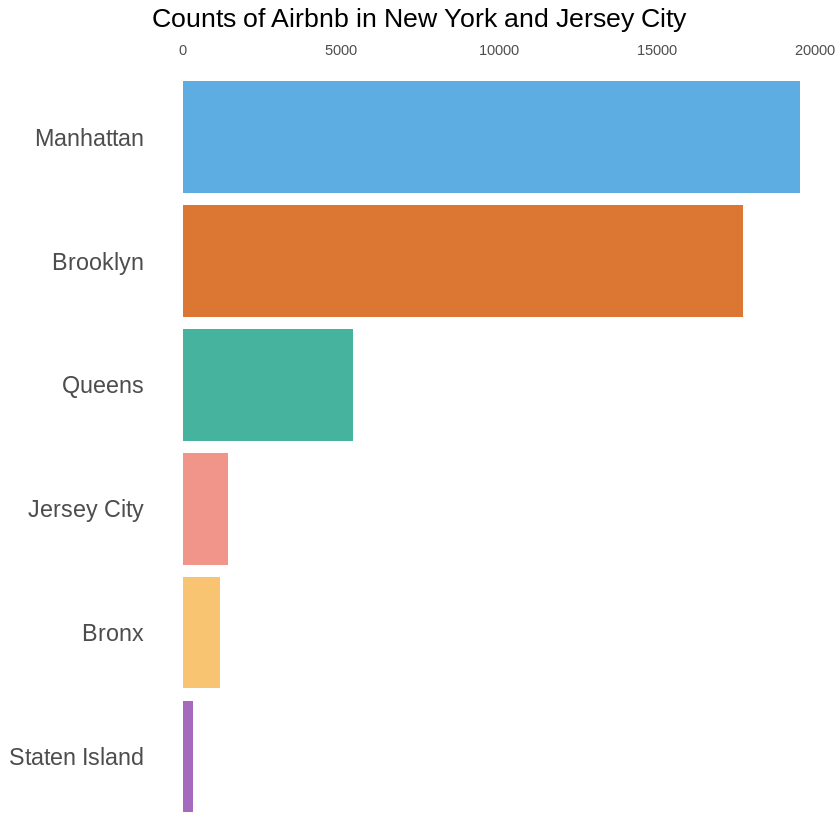

In [14]:
df_reviews_group <- df_reviews %>% group_by(neighborhood_group) %>% dplyr::summarise(count = n()) %>% arrange(desc(count))
ggplot(df_reviews_group, aes(reorder(neighborhood_group, count), 
                             count, fill = neighborhood_group)) + geom_bar(stat = "identity") +
# geom_text(mapping = aes(label = round(count)),size = 5,
# vjust=0.5, hjust= -0.1, color = "black") +
labs(title = "Counts of Airbnb in New York and Jersey City")+
coord_flip() +
theme_minimal() + theme(legend.position = "none") +
scale_y_continuous(position = "right") +
theme(axis.ticks =element_blank(),
axis.title=element_blank(), axis.text.y= element_text(size =14)) +
theme(plot.title = element_text(size=16)) +
theme(panel.grid.major=element_blank())+
theme(panel.grid.minor=element_blank())+
scale_fill_manual(values = c("#F8C471","#DC7633","#F1948A","#5DADE2","#45B39D","#A569BD"))




#### Price distribution per neighborhood_group

Warning message:
“Removed 305 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 305 rows containing non-finite values (stat_boxplot).”

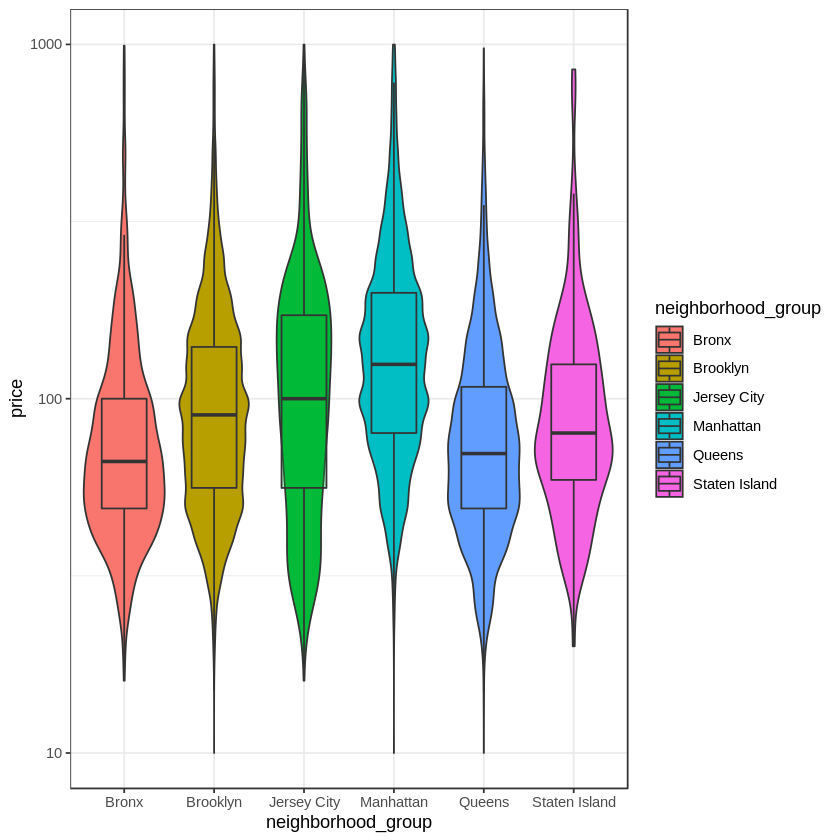

In [15]:
ggplot(df_reviews, aes(neighborhood_group, price, fill = neighborhood_group)) + geom_violin() + 
geom_boxplot(alpha = 0.3, outlier.shape =NA, width =.5) + scale_y_log10()+
theme_bw()

#### Airbnb vs. Hotel for Price in New York City

In [16]:
df_hotel$price <- (df_hotel$high_rate + df_hotel$low_rate)/2
df_hotel_avg <- df_hotel %>% summarise(avg_hotel= mean(df_hotel$price, na.rm=TRUE))


In [17]:
df_hotel_avg$name <- 'Hotel'                         
df_reviews_avg <- df_reviews %>% summarise(avg_ab = mean(df_reviews$price, na.rm=TRUE))
df_reviews_avg$name <- 'Airbnb'

df_reviews_avg[nrow(df_reviews_avg) + 1, ] <- df_hotel_avg
df_reviews_avg[,c(2,1)]

name   avg_ab  
1 Airbnb 132.0789
2 Hotel  221.4119

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


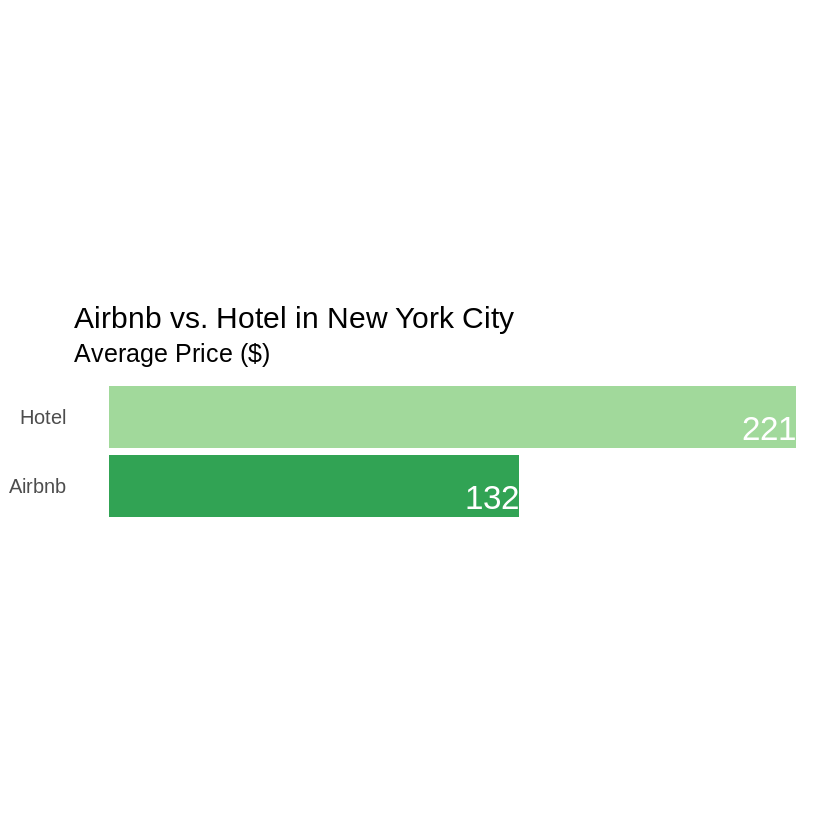

In [18]:

ggplot(df_reviews_avg, aes(name, avg_ab, fill = factor(avg_ab))) + 
geom_bar(stat = "identity") +
geom_text(mapping = aes(label = round(avg_ab)),size = 7, 
          vjust=1, hjust=1, color = "white") + 
coord_flip() +  
theme_minimal() + theme(legend.position = "none") +
theme(axis.ticks=element_blank(),text = element_text(size =15),

axis.title=element_blank(), axis.text.x=element_blank()) +

theme(panel.grid.major=element_blank()) +

theme(panel.grid.minor=element_blank())+

labs(title = "Airbnb vs. Hotel in New York City",
    subtitle = "Average Price ($)") +

scale_x_discrete(labels=c("Airbnb", "Hotel")) + 

scale_x_discrete(labels=c("Airbnb", "Hotel")) +
scale_fill_manual(values = c("#31a354","#a1d99b")) +
theme(aspect.ratio = .2)

      

#### Geospatial Visualization

In [19]:
library(ggmap)
library(maps)
# library(maptools)
# library(sp)
library(RgoogleMaps)
library(geojsonio)
library(rgdal)
data_file <- "https://data.beta.nyc/dataset/0ff93d2d-90ba-457c-9f7e-39e47bf2ac5f/resource/35dd04fb-81b3-479b-a074-a27a37888ce7/download/d085e2f8d0b54d4590b1e7d1f35594c1pediacitiesnycneighborhoods.geojson"
ny_poly <- geojson_read(data_file, what = "sp")

data_file <- "Jc_neighbourhoods.geojson"
jc_poly <- geojson_read(data_file, what = "sp")

apikey <- scan("/dsa/data/all_datasets/ggmap_api_key.txt", what="character")
register_google(key = apikey)

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.

Attaching package: ‘geojsonio’

The following object is masked from ‘package:base’:

    pretty

Loading required package: sp
rgdal: version: 1.4-6, (SVN revision 841)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: /usr/share/gdal/2.2
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.3-1 


In [20]:
# ny_group_n <- df_reviews %>% group_by(neighborhood_group) %>% tally() %>% mutate(percent = n/sum(n)*100)
ny_group_n <- df_reviews %>% group_by(neighborhood) %>% tally()
head(ny_group_n)
quantile(ny_group_n$n, c(0,0.2,0.4,0.6,0.8,0.9, 0.95, 1))

neighborhood  n  
1 Allerton       40
2 Arden Heights   5
3 Arrochar       16
4 Arverne        68
5 Astoria       830
6 Bath Beach     18

0%    20%    40%    60%    80%    90%    95%   100% 
   1.0    8.0   22.4   66.6  230.6  472.8  947.9 3288.0

In [21]:
# combine two json file dataframe
ny_group_n <- df_reviews %>% group_by(neighborhood) %>% tally()
suppressWarnings(plot_data_ny <- tidy(ny_poly, region = "neighborhood"))
suppressWarnings(plot_data_jc <- tidy(jc_poly, region = "neighbourhood"))

# jc_poly plus jc data plus summarised data
join_all <- rbind(plot_data_ny, plot_data_jc)
plot_data <- join_all %>% left_join(.,ny_group_n, by = c("id" = "neighborhood"))
plot_data <- plot_data[!(is.na(plot_data$n)==TRUE),]

head(plot_data)


long      lat      order hole  piece group      id       n 
1 -73.84860 40.87167 1     FALSE 1     Allerton.1 Allerton 40
2 -73.84582 40.87024 2     FALSE 1     Allerton.1 Allerton 40
3 -73.85456 40.85995 3     FALSE 1     Allerton.1 Allerton 40
4 -73.85467 40.85959 4     FALSE 1     Allerton.1 Allerton 40
5 -73.85639 40.85759 5     FALSE 1     Allerton.1 Allerton 40
6 -73.86888 40.85722 6     FALSE 1     Allerton.1 Allerton 40

Source : https://maps.googleapis.com/maps/api/staticmap?center=New%20York%20City&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=New+York+City&key=xxx
Warning message:
“Removed 10025 rows containing missing values (geom_point).”

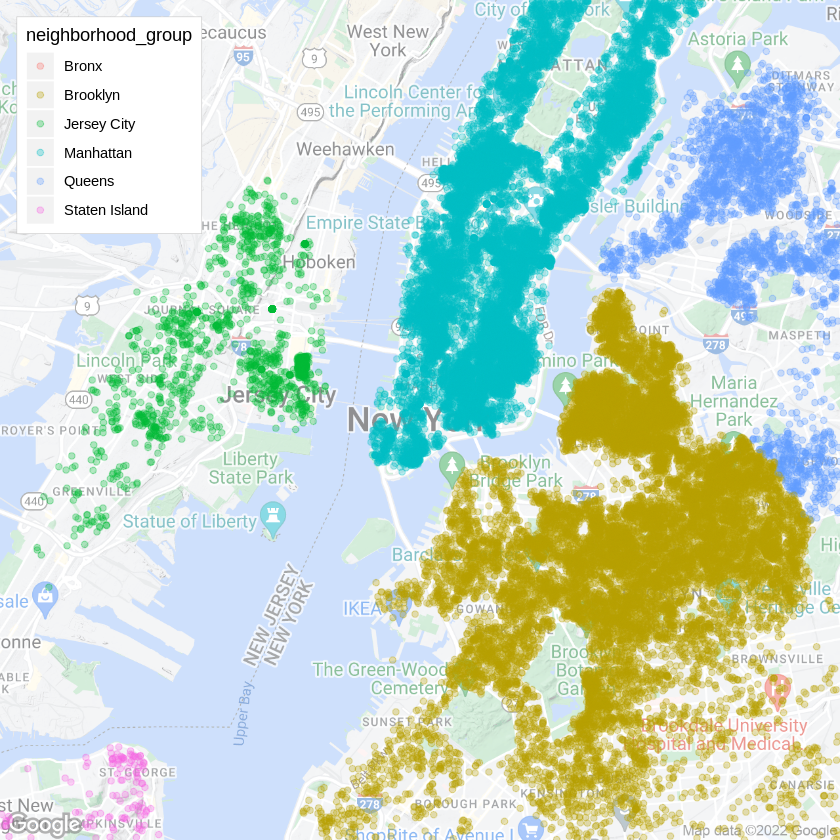

In [22]:
ggmap(get_map("New York City", zoom = 12),extent = "device", legend = "topleft", darken = c(.5,"white")) +
geom_point(data=df_reviews, aes(x = longitude, y = latitude, color = neighborhood_group), alpha=0.3) + 

# scale_color_discrete(low = "yellow", high = "red") + 

scale_alpha(range = c(0.1, 0.4), guide = FALSE)

Source : https://maps.googleapis.com/maps/api/staticmap?center=New%20York%20City&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=New+York+City&key=xxx
Warning message:
“Removed 10025 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 10025 rows containing non-finite values (stat_density2d).”

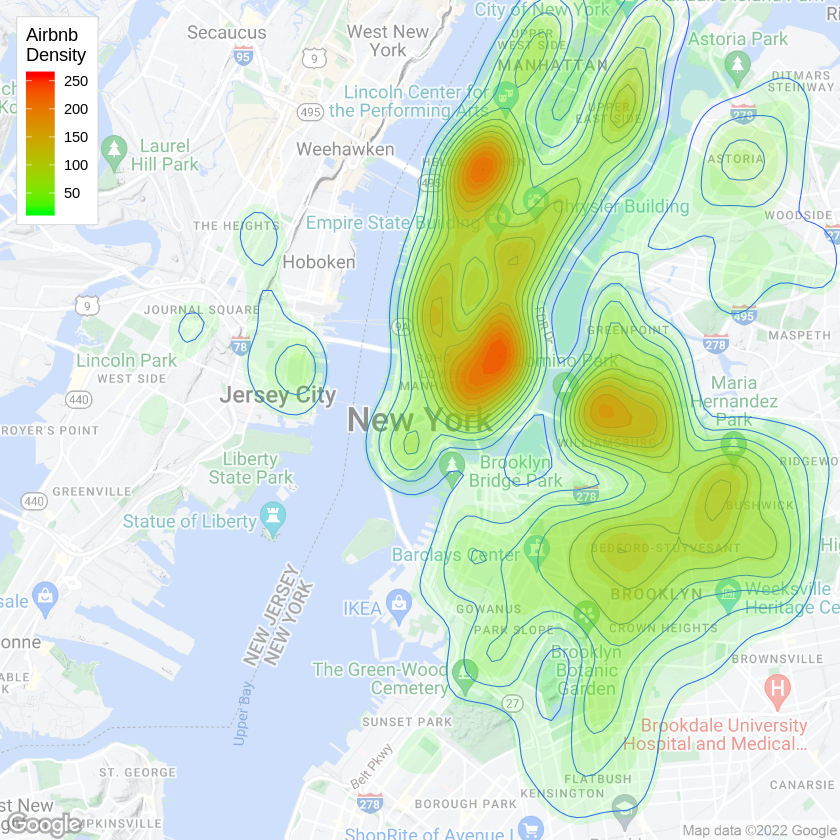

In [23]:
ggmap(get_map("New York City", zoom = 12),extent = "device", legend = "topleft", darken = c(.5,"white")) +

geom_density2d(df_reviews, mapping = aes(x = longitude, y = latitude), size = 0.3) + 

stat_density2d(df_reviews, mapping = aes(x = longitude, y = latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

scale_fill_gradient("Airbnb\nDensity",low = "green", high = "red") + 

scale_alpha(range = c(0.1, 0.4), guide = FALSE)

#### Number of Airbnb by neighborhood

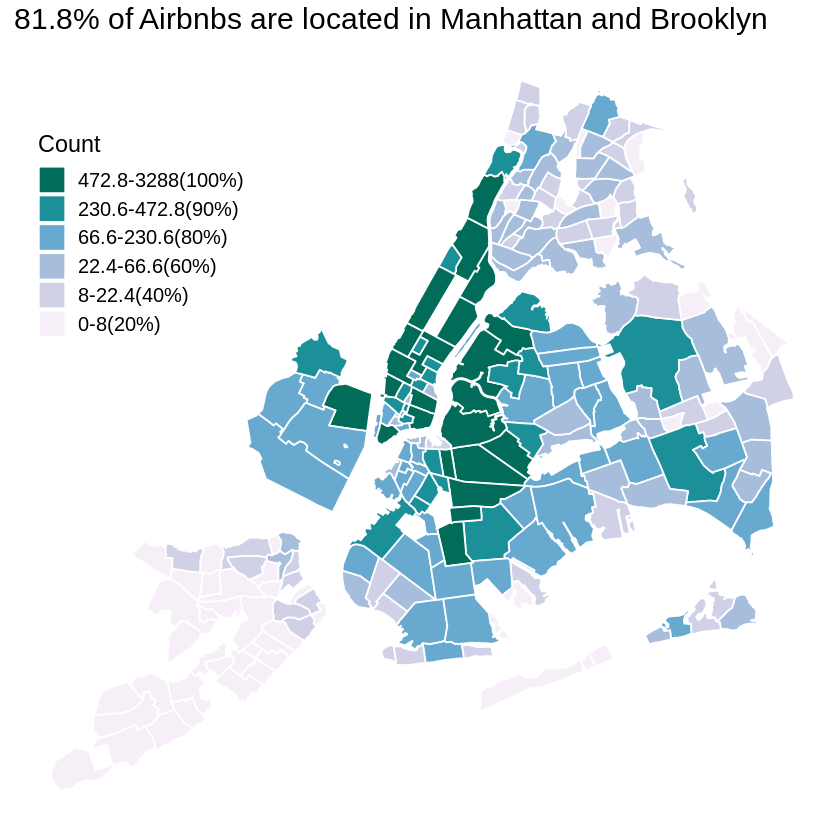

In [24]:
# average counts per neighborhood
breaks <- c(0, 8, 22.4, 66.6, 230.6, 472.8, 3288)
labels = c("0-8(20%)","8-22.4(40%)", "22.4-66.6(60%)","66.6-230.6(80%)","230.6-472.8(90%)","472.8-3288(100%)")
plot_data$brks <- cut(plot_data$n, breaks = breaks, labels = labels)

ggplot() +
geom_polygon(data = plot_data, aes(x = long, y = lat, group = group, fill = brks), color = "white") +
scale_fill_brewer(palette = "PuBuGn") +
theme_minimal() +
theme(axis.ticks=element_blank(),
axis.title =element_blank(), axis.text=element_blank(), plot.title = element_text(size=18)) +
theme(panel.grid.major=element_blank()) +
theme(panel.grid.minor=element_blank()) +
theme(legend.text=element_text(size=12),legend.title=element_text(size=14)) +
labs(fill = "Count", title = "81.8% of Airbnbs are located in Manhattan and Brooklyn") +
theme(legend.position = c(0.3, 0.9), legend.justification = c(1, 1))+
guides(fill = guide_legend(reverse = TRUE))



#### Average Price per neighborhood 


In [25]:
# Average price by neighborhood
df_group_pr <- df_reviews %>% group_by(neighborhood) %>% summarize(price_avg = mean(price, na.rm = TRUE))
quantile(df_group_pr$price_avg, probs = c(0.2, 0.4, 0.6, 0.8, 0.9, 1), na.rm = TRUE)
quantile(df_group_pr$price_avg, na.rm = TRUE)

plot_data <- join_all %>% left_join(.,df_group_pr, by = c("id" = "neighborhood"))
plot_data <- plot_data[!(is.na(plot_data$price_avg)==TRUE),]
head(plot_data)


20%       40%       60%       80%       90%      100% 
 81.32082  92.63781 113.56187 159.39077 189.50147 800.00000

0%       25%       50%       75%      100% 
 48.75000  83.72627 101.28571 145.89606 800.00000

long      lat      order hole  piece group      id       price_avg
1 -73.84860 40.87167 1     FALSE 1     Allerton.1 Allerton 104.7142 
2 -73.84582 40.87024 2     FALSE 1     Allerton.1 Allerton 104.7142 
3 -73.85456 40.85995 3     FALSE 1     Allerton.1 Allerton 104.7142 
4 -73.85467 40.85959 4     FALSE 1     Allerton.1 Allerton 104.7142 
5 -73.85639 40.85759 5     FALSE 1     Allerton.1 Allerton 104.7142 
6 -73.86888 40.85722 6     FALSE 1     Allerton.1 Allerton 104.7142

Source : https://maps.googleapis.com/maps/api/staticmap?center=New%20York%20City&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=New+York+City&key=xxx


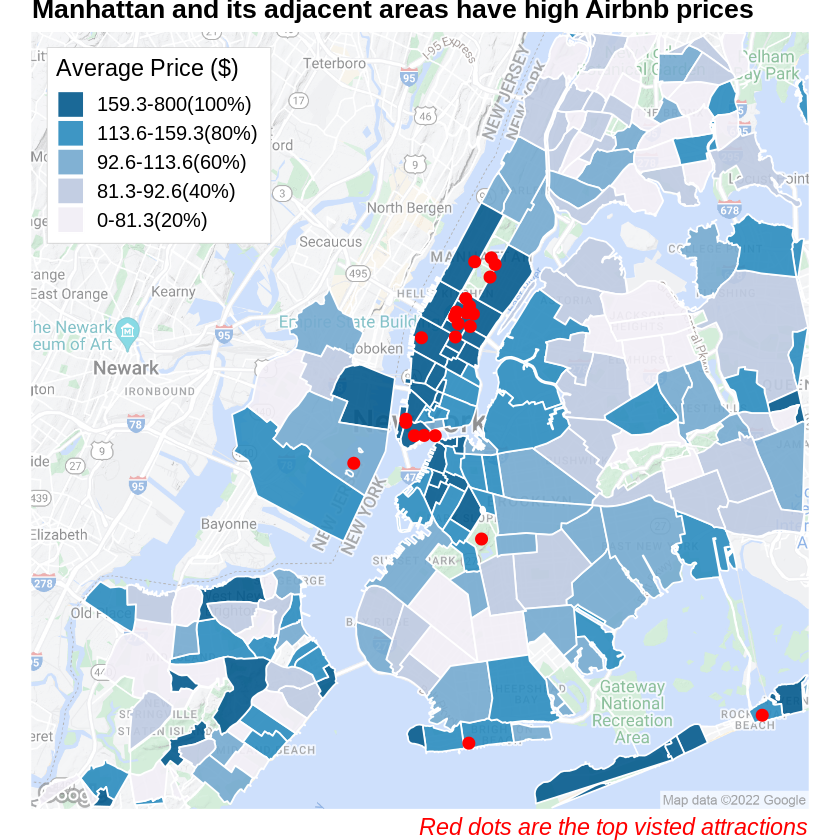

In [26]:
# average price per neighborhood
breaks <- c(0, 81.3, 92.6, 113.6, 159.3, 800)
labels = c("0-81.3(20%)","81.3-92.6(40%)","92.6-113.6(60%)","113.6-159.3(80%)","159.3-800(100%)")
plot_data$brks <- cut(plot_data$price_avg, breaks = breaks, labels = labels)

ggmap(get_map("New York City", zoom = 11), extent = "device", legend = "topleft", darken = c(.5,"white")) +
geom_polygon(data = plot_data, aes(x = long, y = lat, group = group, fill = brks), color = "white", alpha =.9) +
geom_point(df_attr, mapping = aes(x=Long, y=Lat), size = 3, color = "red") +
theme(legend.text=element_text(size=12),legend.title=element_text(size=14)) +
labs(fill = "Average Price ($)", title = "Manhattan and its adjacent areas have high Airbnb prices", caption = " Red dots are the top visted attractions") +
theme(plot.title = element_text(size=16, face = "bold"), plot.caption = element_text(size=14, color = "red", face = "italic")) +
guides(fill = guide_legend(reverse = TRUE)) +
scale_fill_brewer(palette = "PuBu") 


#### Location Score per neighborhood_group

In [27]:
# unique(df_reviews$review_scores_location)
# df_reviews %>% group_by(neighborhood) %>% summarize(avg_lo = mean(review_scores_location))



In [28]:
df_reviews_lo <- df_reviews[!is.na(df_reviews$review_scores_location),]
df_reviews_lo <- df_reviews_lo[(df_reviews_lo$review_scores_location!=0.19),]
df_reviews_lo <- df_reviews_lo[(df_reviews_lo$review_scores_location!=50),]
df_reviews_lo <- df_reviews_lo[(df_reviews_lo$review_scores_location!=37),]
df_reviews_lo <- df_reviews_lo[(df_reviews_lo$review_scores_location!=0.16),]
df_reviews_lo <- df_reviews_lo[(df_reviews_lo$review_scores_location!=0.57),]
df_reviews_lo <- df_reviews_lo[(df_reviews_lo$review_scores_location!=104),]
df_reviews_lo <- df_reviews_lo[(df_reviews_lo$review_scores_location!=111),]
df_reviews_lo <- df_reviews_lo[(df_reviews_lo$review_scores_location!=0.11),]

unique(df_reviews_lo$review_scores_location)
quantile(df_reviews_lo$review_scores_location, c(0, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8,1)) 



[1] 10  9  8  7  6  2  4  3  5

0%   5%  10%  20%  40%  60%  80% 100% 
   2    8    9    9   10   10   10   10

In [29]:
#Average location score by neighborhood
df_group_lo <- df_reviews_lo %>% group_by(neighborhood) %>% summarize(location_avg = mean(review_scores_location, na.rm = TRUE))
df_group_lo[!(is.na(df_group_lo$location_avg)==TRUE),]

plot_data <- join_all %>% left_join(.,df_group_lo, by = c("id" = "neighborhood"))
plot_data <- plot_data[!(is.na(plot_data$location_avg)==TRUE), ]
head(plot_data)
quantile(df_group_lo$location_avg, c(0, 0.2, 0.4, 0.6, 0.8, 1))


neighborhood                                location_avg
1   Allerton                                     9.428571   
2   Arden Heights                                9.500000   
3   Arrochar                                     9.500000   
4   Arverne                                      9.687500   
5   Astoria                                      9.729335   
6   Bath Beach                                   9.600000   
7   Battery Park City                            9.882353   
8   Bay Ridge                                    9.722222   
9   Bay Terrace                                  9.400000   
10  Baychester                                   9.454545   
11  Bayside                                      9.722222   
12  Bayswater                                    9.400000   
13  Bedford-Stuyvesant                           9.315128   
14  Belle Harbor                                10.000000   
15  Bellerose                                   10.000000   
16  Belmont                                      9.384615   
17  Bensonhurst                                  9.235294   
18  Bergen Beach                                 9.363636   
19  Boerum Hill                                  9.909774   
20  Borough Park                                 9.162791   
21  Breezy Point                                10.000000   
22  Briarwood                                    9.444444   
23  Brighton Beach                               9.678571   
24  Bronxdale                                    9.333333   
25  Brooklyn Heights                             9.951923   
26  Brownsville                                  8.966102   
27  Bull's Head                                 10.000000   
28  Bushwick                                     9.416449   
29  Cambria Heights                              9.850000   
30  Canarsie                                     9.207143   
⋮   ⋮                                           ⋮           
195 Tremont                                      9.461538   
196 Tribeca                                      9.828283   
197 Two Bridges                                  9.423077   
198 Unionport                                    9.857143   
199 University Heights                           9.250000   
200 Upper East Side                              9.801056   
201 Upper West Side                              9.840820   
202 Van Nest                                     9.400000   
203 Vinegar Hill                                 9.300000   
204 Wakefield                                    9.254237   
205 Ward A (councilmember Denise Ridley)         9.068966   
206 Ward B (councilmember Mira Prinz-Arey)       8.988506   
207 Ward C (councilmember Richard Boggiano)      9.363636   
208 Ward D (councilmember Michael Yun)           9.298343   
209 Ward E (councilmember James Solomon)         9.751462   
210 Ward F (councilmember Jermaine D. Robinson)  8.729927   
211 Washington Heights                           9.385220   
212 West Brighton                                9.529412   
213 West Farms                                   4.333333   
214 West Village                                 9.949900   
215 Westchester Square                           9.857143   
216 Westerleigh                                 10.000000   
217 Whitestone                                   9.875000   
218 Williamsbridge                               9.000000   
219 Williamsburg                                 9.778896   
220 Willowbrook                                  9.000000   
221 Windsor Terrace                              9.807018   
222 Woodhaven                                    9.375000   
223 Woodlawn                                     9.714286   
224 Woodside                                     9.586735

long      lat      order hole  piece group      id       location_avg
1 -73.84860 40.87167 1     FALSE 1     Allerton.1 Allerton 9.428571    
2 -73.84582 40.87024 2     FALSE 1     Allerton.1 Allerton 9.428571    
3 -73.85456 40.85995 3     FALSE 1     Allerton.1 Allerton 9.428571    
4 -73.85467 40.85959 4     FALSE 1     Allerton.1 Allerton 9.428571    
5 -73.85639 40.85759 5     FALSE 1     Allerton.1 Allerton 9.428571    
6 -73.86888 40.85722 6     FALSE 1     Allerton.1 Allerton 9.428571

0%       20%       40%       60%       80%      100% 
 4.333333  9.299337  9.457381  9.666667  9.833654 10.000000

Source : https://maps.googleapis.com/maps/api/staticmap?center=New%20York%20City&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=New+York+City&key=xxx


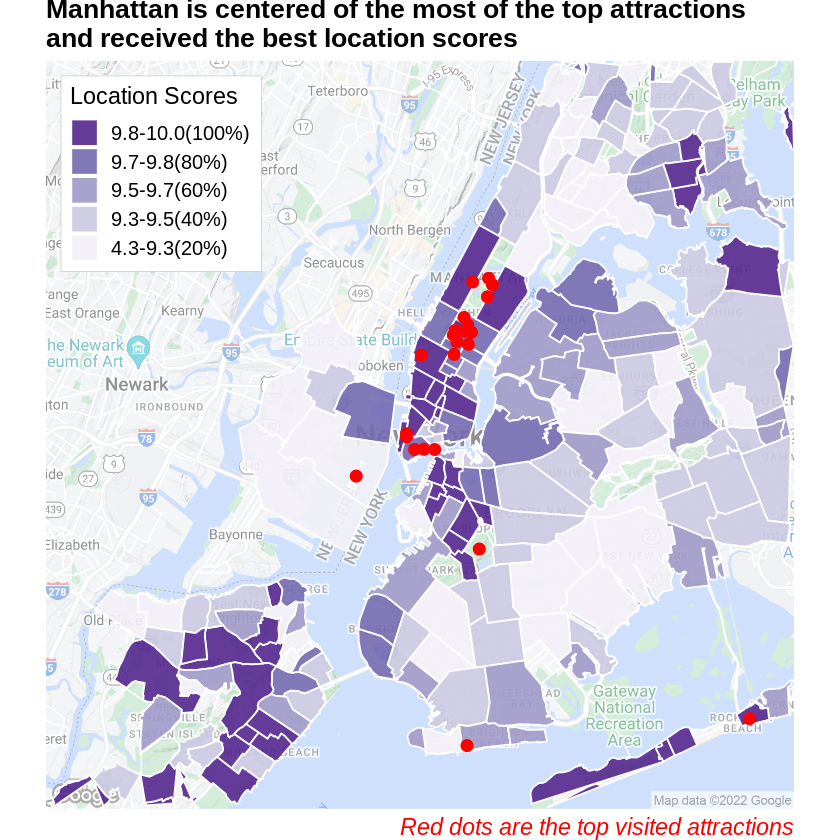

In [30]:
# 20%,40%, 60%, 80%, 100% of average rating per neighborhood
breaks <- c(4.33, 9.3, 9.5, 9.7, 9.8, 10)
labels = c("4.3-9.3(20%)","9.3-9.5(40%)","9.5-9.7(60%)","9.7-9.8(80%)","9.8-10.0(100%)")
plot_data$brks_lo <- cut(plot_data$location_avg, breaks = breaks, labels = labels)

ggmap(get_map("New York City", zoom = 11), extent = "device", legend = "topleft", darken = c(.5,"white")) +
geom_polygon(data = plot_data, aes(x = long, y = lat, group = group, fill = brks_lo), color = "white", alpha =.9) +
geom_point(df_attr, mapping = aes(x=Long, y=Lat), size = 3, color = "red") +
theme(legend.text=element_text(size=12),legend.title=element_text(size=14)) +
labs(fill = "Location Scores", title = "Manhattan is centered of the most of the top attractions \nand received the best location scores", caption = "Red dots are the top visited attractions") +
theme(plot.title = element_text(size=16, face = "bold"), plot.caption = element_text(size=14, color = "red", face = "italic")) +
guides(fill = guide_legend(reverse = TRUE)) +
scale_fill_brewer(palette = "Purples") 

#### Overall Rating

In [31]:
# df_reviews_rt <- df_reviews %>% select(neighborhood_group, neighborhood, price, rating, cleanliness) %>% group_by(neighborhood_group, neighborhood) %>% dplyr::summarise(price_avg = mean(price, na.rm=TRUE), rating_avg = mean(rating, na.rm=TRUE), clean_avg = mean(cleanliness, na.rm=TRUE), count = n()) %>% filter(price_avg >83.72 & price_avg < 145.90 & count>10)
# df_reviews_rt <- df_reviews %>% select(neighborhood_group, neighborhood, price, rating, cleanliness) %>% group_by(neighborhood_group, neighborhood) %>% dplyr::summarise(price_avg = mean(price, na.rm=TRUE), rating_avg = mean(rating, na.rm=TRUE), clean_avg = mean(cleanliness, na.rm=TRUE), count = n()) %>% filter(count>10)
df_reviews_rt <- df_reviews %>% select(neighborhood_group, neighborhood, price, rating, cleanliness) %>% group_by(neighborhood_group, neighborhood) %>% dplyr::summarise(price_avg = mean(price, na.rm=TRUE), rating_avg = mean(rating, na.rm=TRUE), clean_avg = mean(cleanliness, na.rm=TRUE), count = n()) %>% filter(price_avg >64 & price_avg < 160 & count>10)
df_reviews_rt$fill <- ifelse(df_reviews_rt$neighborhood_group == 'Manhattan', 'Manhattan',
                  ifelse(df_reviews_rt$neighborhood_group == "Staten Island", 'Staten Island', 'Others'))

head(df_reviews_rt)

neighborhood_group neighborhood      price_avg rating_avg clean_avg count
1 Bronx              Allerton          104.71425 93.37143   9.457143  40   
2 Bronx              Baychester         83.21429 95.45455   9.818182  14   
3 Bronx              Bronxdale          67.85045 94.00000   9.444444  22   
4 Bronx              City Island       128.40000 98.30769   9.923077  15   
5 Bronx              Claremont Village  85.34407 95.15000   9.350000  27   
6 Bronx              Clason Point       90.84000 96.73684   9.789474  25   
  fill  
1 Others
2 Others
3 Others
4 Others
5 Others
6 Others

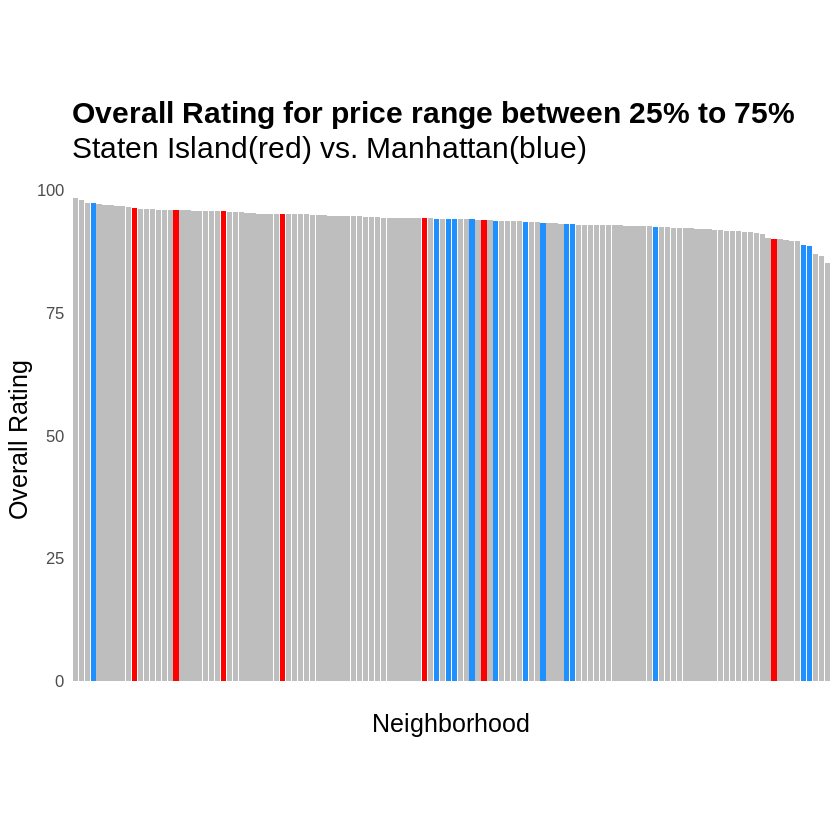

In [32]:
ggplot(df_reviews_rt, aes(reorder(neighborhood, -rating_avg), rating_avg, fill = fill)) + geom_bar(stat = "identity") +
scale_fill_manual(values = c("dodgerblue", "grey","red")) +
theme_minimal() +
theme(axis.text.x = element_blank(), axis.title = element_text(size =15), axis.text.y = element_text(size =10)) +
theme(panel.grid.major=element_blank()) +
theme(panel.grid.minor=element_blank()) +
theme(legend.position = "none") +
theme(plot.title = element_text(size=18, face = "bold"), plot.subtitle = element_text(size=18))+
xlab("Neighborhood") + ylab("Overall Rating") +
labs(title = "Overall Rating for price range between 25% to 75%",
    subtitle = "Staten Island(red) vs. Manhattan(blue)") +
theme(aspect.ratio = .7)



#### Cleanliness Scores

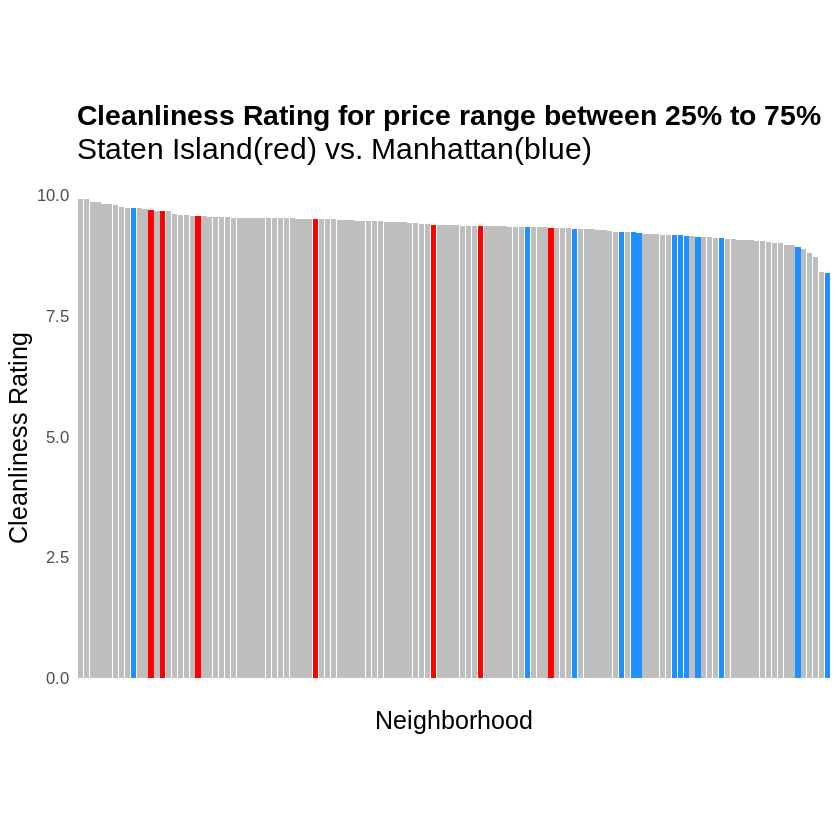

In [33]:
# head(df_reviews_rt)
ggplot(df_reviews_rt, aes(reorder(neighborhood, -clean_avg), clean_avg, fill = fill)) + geom_bar(stat = "identity") +
scale_fill_manual(values = c("dodgerblue", "grey","red")) +
theme_minimal() +
theme(axis.text.x = element_blank(), axis.title = element_text(size =15), axis.text.y = element_text(size =10)) +
theme(panel.grid.major=element_blank()) +
theme(panel.grid.minor=element_blank()) +
theme(legend.position = "none") +
theme(plot.title = element_text(size=17, face = "bold"), plot.subtitle = element_text(size=18))+
xlab("Neighborhood") + ylab("Cleanliness Rating") +
labs(title = "Cleanliness Rating for price range between 25% to 75%",
    subtitle = "Staten Island(red) vs. Manhattan(blue)") +
theme(aspect.ratio = .7)



#### Heatmap to see overall trend per neighborhood_group

In [34]:
library(reshape2)
library(dplyr)
library(scales)
library(plyr)

ny_heatmap <- df_ny[,c('neighbourhood_group_cleansed','price','review_scores_location','review_scores_rating','review_scores_communication', 'review_scores_cleanliness', 'beds','bedrooms','reviews_per_month','number_of_reviews')]
jc_heatmap <- df_jc[,c('neighbourhood_group_cleansed','price','review_scores_location', 'review_scores_rating', 'review_scores_communication','review_scores_cleanliness', 'beds','bedrooms','reviews_per_month','number_of_reviews')]
df_heatmap <- rbind(ny_heatmap, jc_heatmap)

dim(df_heatmap)
colnames(df_heatmap)


------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following object is masked from ‘package:maps’:

    ozone

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

Warning message in `[<-.factor`(`*tmp*`, ri, value = c(10L, 0L, 0L, 125L, 353L, :
“invalid factor level, NA generated”

[1] 45679    10

[1] "neighbourhood_group_cleansed" "price"                       
 [3] "review_scores_location"       "review_scores_rating"        
 [5] "review_scores_communication"  "review_scores_cleanliness"   
 [7] "beds"                         "bedrooms"                    
 [9] "reviews_per_month"            "number_of_reviews"

In [35]:
colnames(df_heatmap)[1] <- 'neighborhood_group'
colnames(df_heatmap)[4] <- 'overall_rating'

df_heatmap$overall_rating <- as.numeric(as.character(df_heatmap$overall_rating))
df_heatmap$price = as.numeric(gsub("\\$", "", df_heatmap$price))
df_heatmap$bedrooms <- as.numeric(as.character(df_heatmap$bedrooms))
df_heatmap$beds <- as.numeric(as.character(df_heatmap$beds))
df_heatmap$overall_rating<- as.numeric(as.character(df_heatmap$overall_rating))
df_heatmap$review_scores_location <- as.numeric(as.character(df_heatmap$review_scores_location))
df_heatmap$review_scores_cleanliness <- as.numeric(as.character(df_heatmap$review_scores_cleanliness))
df_heatmap$reviews_per_month <- as.numeric(as.character(df_heatmap$reviews_per_month))
df_heatmap$number_of_reviews <- as.numeric(as.character(df_heatmap$number_of_reviews))
df_heatmap$review_scores_communication <- as.numeric(as.character(df_heatmap$review_scores_communication))

df_heatmap <- df_heatmap[!grepl("\\d", df_heatmap$neighborhood_group),]

df_heatmap$neighborhood_group[grepl("United", df_heatmap$neighborhood_group)] = "Jersey City"
df_heatmap <- df_heatmap[!grepl("Priva", df_heatmap$neighborhood_group),]
df_heatmap <- df_heatmap[!grepl("Entire", df_heatmap$neighborhood_group),]
df_heatmap <- df_heatmap[!grepl("Dishes", df_heatmap$neighborhood_group),]
df_heatmap <- df_heatmap[!grepl("email", df_heatmap$neighborhood_group),]
df_heatmap <- df_heatmap[!(df_heatmap$neighborhood_group == 't'),]
df_heatmap$neighborhood_group <- as.character(df_heatmap$neighborhood_group)
df_heatmap$neighborhood_group[df_heatmap$neighborhood_group == ""] <- "Jersey City"
df_heatmap <- df_heatmap[!(is.na(df_heatmap$neighborhood_group)),]



Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in `[<-.factor`(`*tmp*`, grepl("United", df_heatmap$neighborhood_group), :
“invalid factor level, NA generated”

In [36]:
head(df_heatmap)
df_heatmap %>% group_by(neighborhood_group) %>% tally()

neighborhood_group price review_scores_location overall_rating
1 Manhattan          175   10                     94            
2 Brooklyn            76    9                     89            
3 Brooklyn            60    9                     90            
4 Brooklyn           175    8                     97            
5 Manhattan           73   10                     84            
6 Manhattan           75   10                     98            
  review_scores_communication review_scores_cleanliness beds bedrooms
1 10                           9                        1    NA      
2  9                           9                        3     1      
3 10                           8                        1     1      
4 10                          10                        2     2      
5  9                           7                        1     1      
6 10                          10                        1     1      
  reviews_per_month number_of_reviews
1 0.36               48              
2 4.82              354              
3 0.36               50              
4 0.01                1              
5 3.40              473              
6 0.87              118

neighborhood_group n    
1 Bronx               1153
2 Brooklyn           17742
3 Jersey City         1438
4 Manhattan          19537
5 Queens              5394
6 Staten Island        308

In [37]:
df_heatmap_group <- df_heatmap %>% group_by(neighborhood_group) %>% summarise_all("mean", na.rm = TRUE) %>% arrange(price) 

df_heatmap_group$neighborhood_group <- reorder(df_heatmap_group$neighborhood_group, df_heatmap_group$review_scores_location)
ht <- melt(df_heatmap_group)
ht <- ddply(ht, .(variable), transform, rescale=rescale(value))

head(ht)
head(df_heatmap)

Using neighborhood_group as id variables


neighborhood_group variable value     rescale   
1 Bronx              price     89.95858 0.00000000
2 Queens             price     92.15398 0.03026105
3 Staten Island      price    110.45648 0.28253920
4 Brooklyn           price    114.01059 0.33152836
5 Jersey City        price    140.87745 0.70185599
6 Manhattan          price    162.50747 1.00000000

neighborhood_group price review_scores_location overall_rating
1 Manhattan          175   10                     94            
2 Brooklyn            76    9                     89            
3 Brooklyn            60    9                     90            
4 Brooklyn           175    8                     97            
5 Manhattan           73   10                     84            
6 Manhattan           75   10                     98            
  review_scores_communication review_scores_cleanliness beds bedrooms
1 10                           9                        1    NA      
2  9                           9                        3     1      
3 10                           8                        1     1      
4 10                          10                        2     2      
5  9                           7                        1     1      
6 10                          10                        1     1      
  reviews_per_month number_of_reviews
1 0.36               48              
2 4.82              354              
3 0.36               50              
4 0.01                1              
5 3.40              473              
6 0.87              118

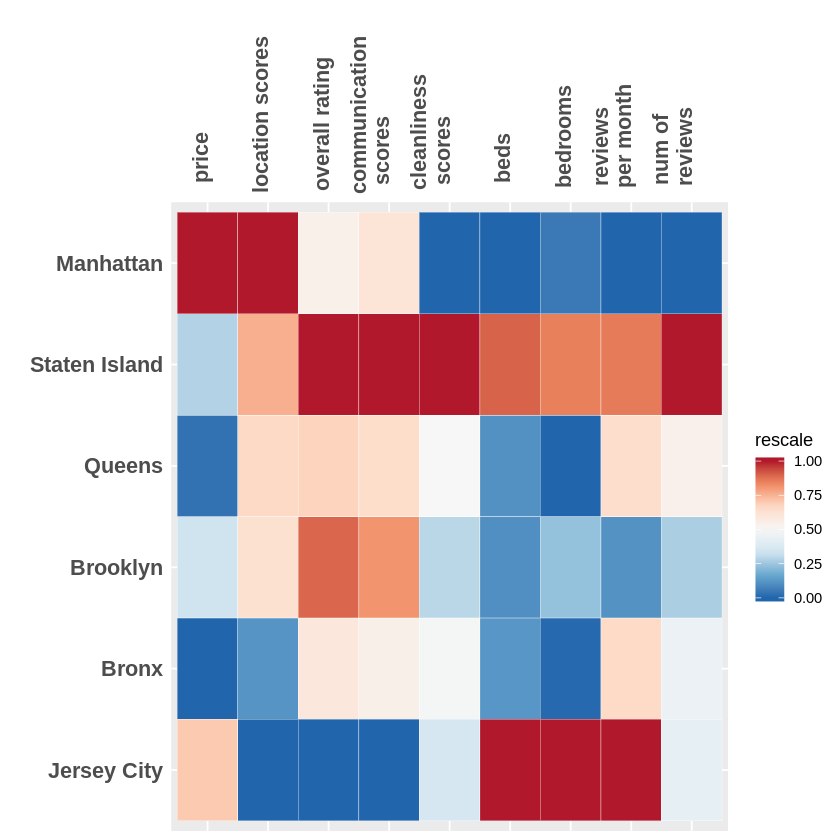

In [38]:
# heatmap to see overall trend per neighborhood_group

ggplot(ht, aes(variable, neighborhood_group))+
geom_tile(aes(fill = rescale), color = "white") + 
scale_fill_distiller(palette = "RdBu") +
# scale_fill_gradient(low = "white",high = "steelblue") + 
labs(x="", y="") + 
scale_x_discrete(position = "top",labels = c("price" = "price", "review_scores_location" = "location scores", "overall_rating" = "overall rating", "review_scores_communication" = "communication \nscores", "review_scores_cleanliness" = "cleanliness \nscores", "beds" = "beds", "bedrooms" = "bedrooms", "reviews_per_month" = "reviews \nper month", "number_of_reviews" = "num of \nreviews")) +
theme(axis.text.x = element_text(angle = 90, face="bold", size=13, hjust = 0.1),
      axis.text.y = element_text(face="bold", size=13),
     axis.ticks=element_blank()) 


Using neighborhood_group as id variables


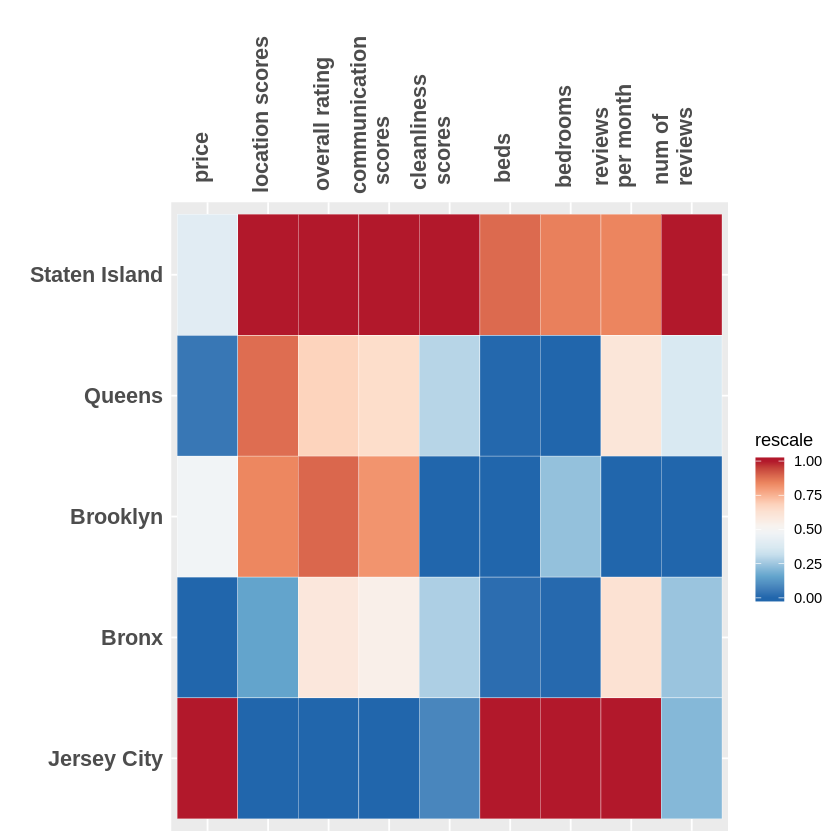

In [39]:
# low price test. When price range is between 25% ~ 75%, mantattan groups are disappeared

df_heatmap_group <- df_heatmap %>% group_by(neighborhood_group) %>% summarise_all("mean", na.rm = TRUE) %>% filter(price >83.72 & price < 145.90) %>% arrange(price) 

df_heatmap_group$neighborhood_group <- reorder(df_heatmap_group$neighborhood_group, df_heatmap_group$review_scores_location)
ht <- melt(df_heatmap_group)
ht <- ddply(ht, .(variable), transform, rescale=rescale(value))

ggplot(ht, aes(variable, neighborhood_group))+
geom_tile(aes(fill = rescale), color = "white") + 
scale_fill_distiller(palette = "RdBu") +
# scale_fill_gradient(low = "white",high = "steelblue") + 
labs(x="", y="") + 
scale_x_discrete(position = "top",labels = c("price" = "price", "review_scores_location" = "location scores", "overall_rating" = "overall rating", "review_scores_communication" = "communication \nscores", "review_scores_cleanliness" = "cleanliness \nscores", "beds" = "beds", "bedrooms" = "bedrooms", "reviews_per_month" = "reviews \nper month", "number_of_reviews" = "num of \nreviews")) +
theme(axis.text.x = element_text(angle = 90, face="bold", size=13, hjust = 0.1),
      axis.text.y = element_text(face="bold", size=13),
     axis.ticks=element_blank()) 


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


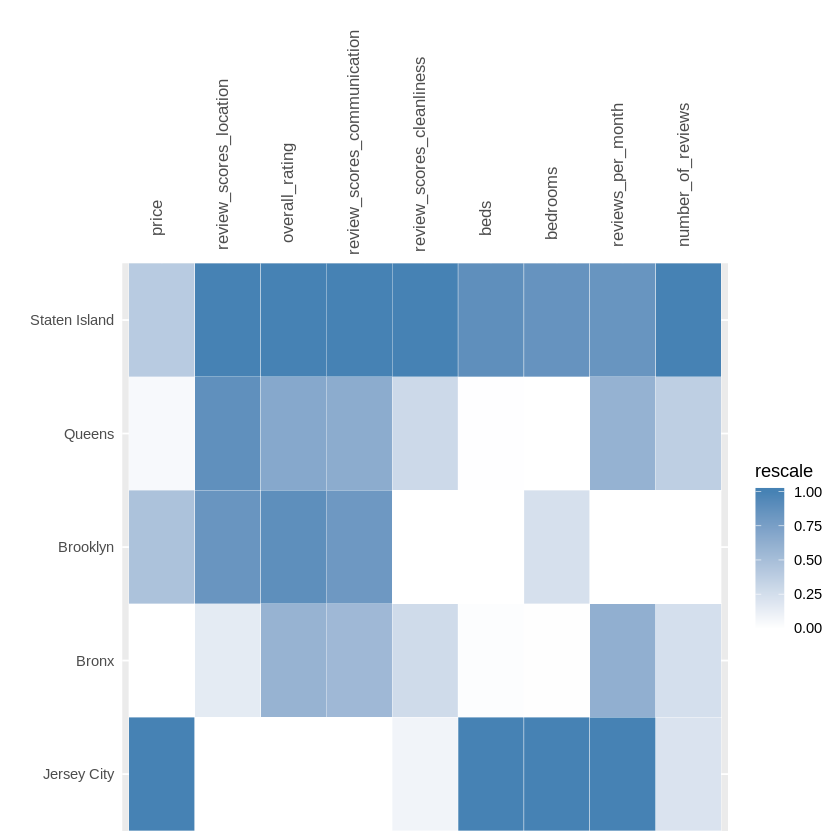

In [40]:
ggplot(ht, aes(variable, neighborhood_group))+
geom_tile(aes(fill = rescale), color = "white") + 
scale_fill_gradient(low = "white",high = "steelblue") +
labs(x="", y="") + 
scale_x_discrete(expand = c(0, 0), labels = c("price" = "price", "review_scores_location" = "location scores", "overall_rating" = "overall rating", "review_scores_communication" = "communication scores", "review_scores_cleanliness" = "cleanliness scores", "beds" = "beds", "bedrooms" = "bedrooms", "review_per_month" = "reviews per month", "number_of_reviews" = "num of reviews")) +
scale_y_discrete(expand = c(0, 0)) +  
theme(axis.text.x = element_text(angle = 90, size=10, hjust = 0.1, vjust = 0.5),
     axis.ticks=element_blank()) +
scale_x_discrete(position = "top")